In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
family_income_data = pd.read_csv('./dataset/Family Income and Expenditure.csv')

In [5]:
family_income_data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [6]:
import missingno as msno

First thing I want to is to check if there are missing values in my dataset. I accomplish this using the **missingno** library's Matrix method. This helps me visualize where the null values are.

<Axes: >

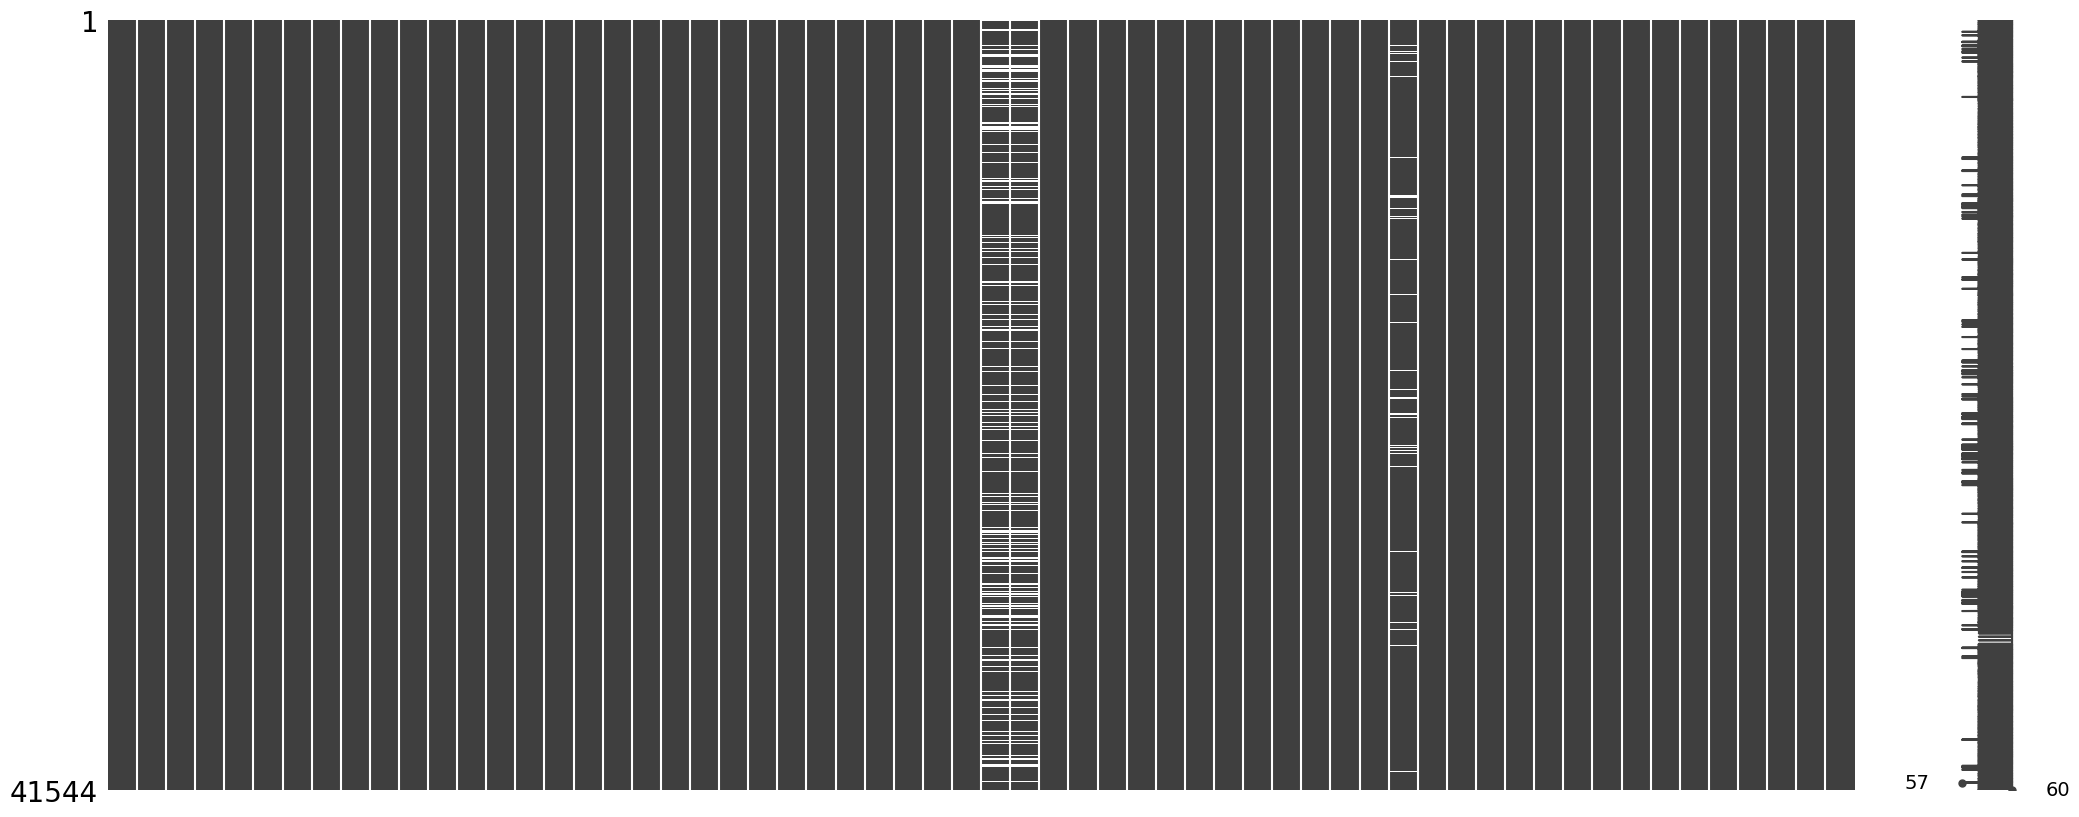

In [7]:
msno.matrix(family_income_data)

## TASK 1: Make a model to Predict Household Income through the Expenditures

Let's see if we can predict `Total Household Income` through the expenditures each family makes. I initiate this by taking all the column names with 'expenditures' in it.

In [8]:
expenditures = [column for column in family_income_data.columns if 'Expenditure' in column]

Checking the values I have:

In [9]:
expenditures

['Total Food Expenditure',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Meat Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Medical Care Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Education Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Special Occasions Expenditure']

I set my features as the splice of the original dataset where the column names are expenditures, and set the target as the `Total Household Income` column

In [10]:
X = family_income_data.loc[:, expenditures]
y = family_income_data['Total Household Income']

Importing the necessary libraries for fitting.

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import Normalizer, PolynomialFeatures, MinMaxScaler, StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVR
from sklearn.decomposition import IncrementalPCA, SparsePCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score,recall_score, classification_report, confusion_matrix

But before I go to training a model, I wanna see first how the the features appear in a scatterplot when treated as a function of the label.

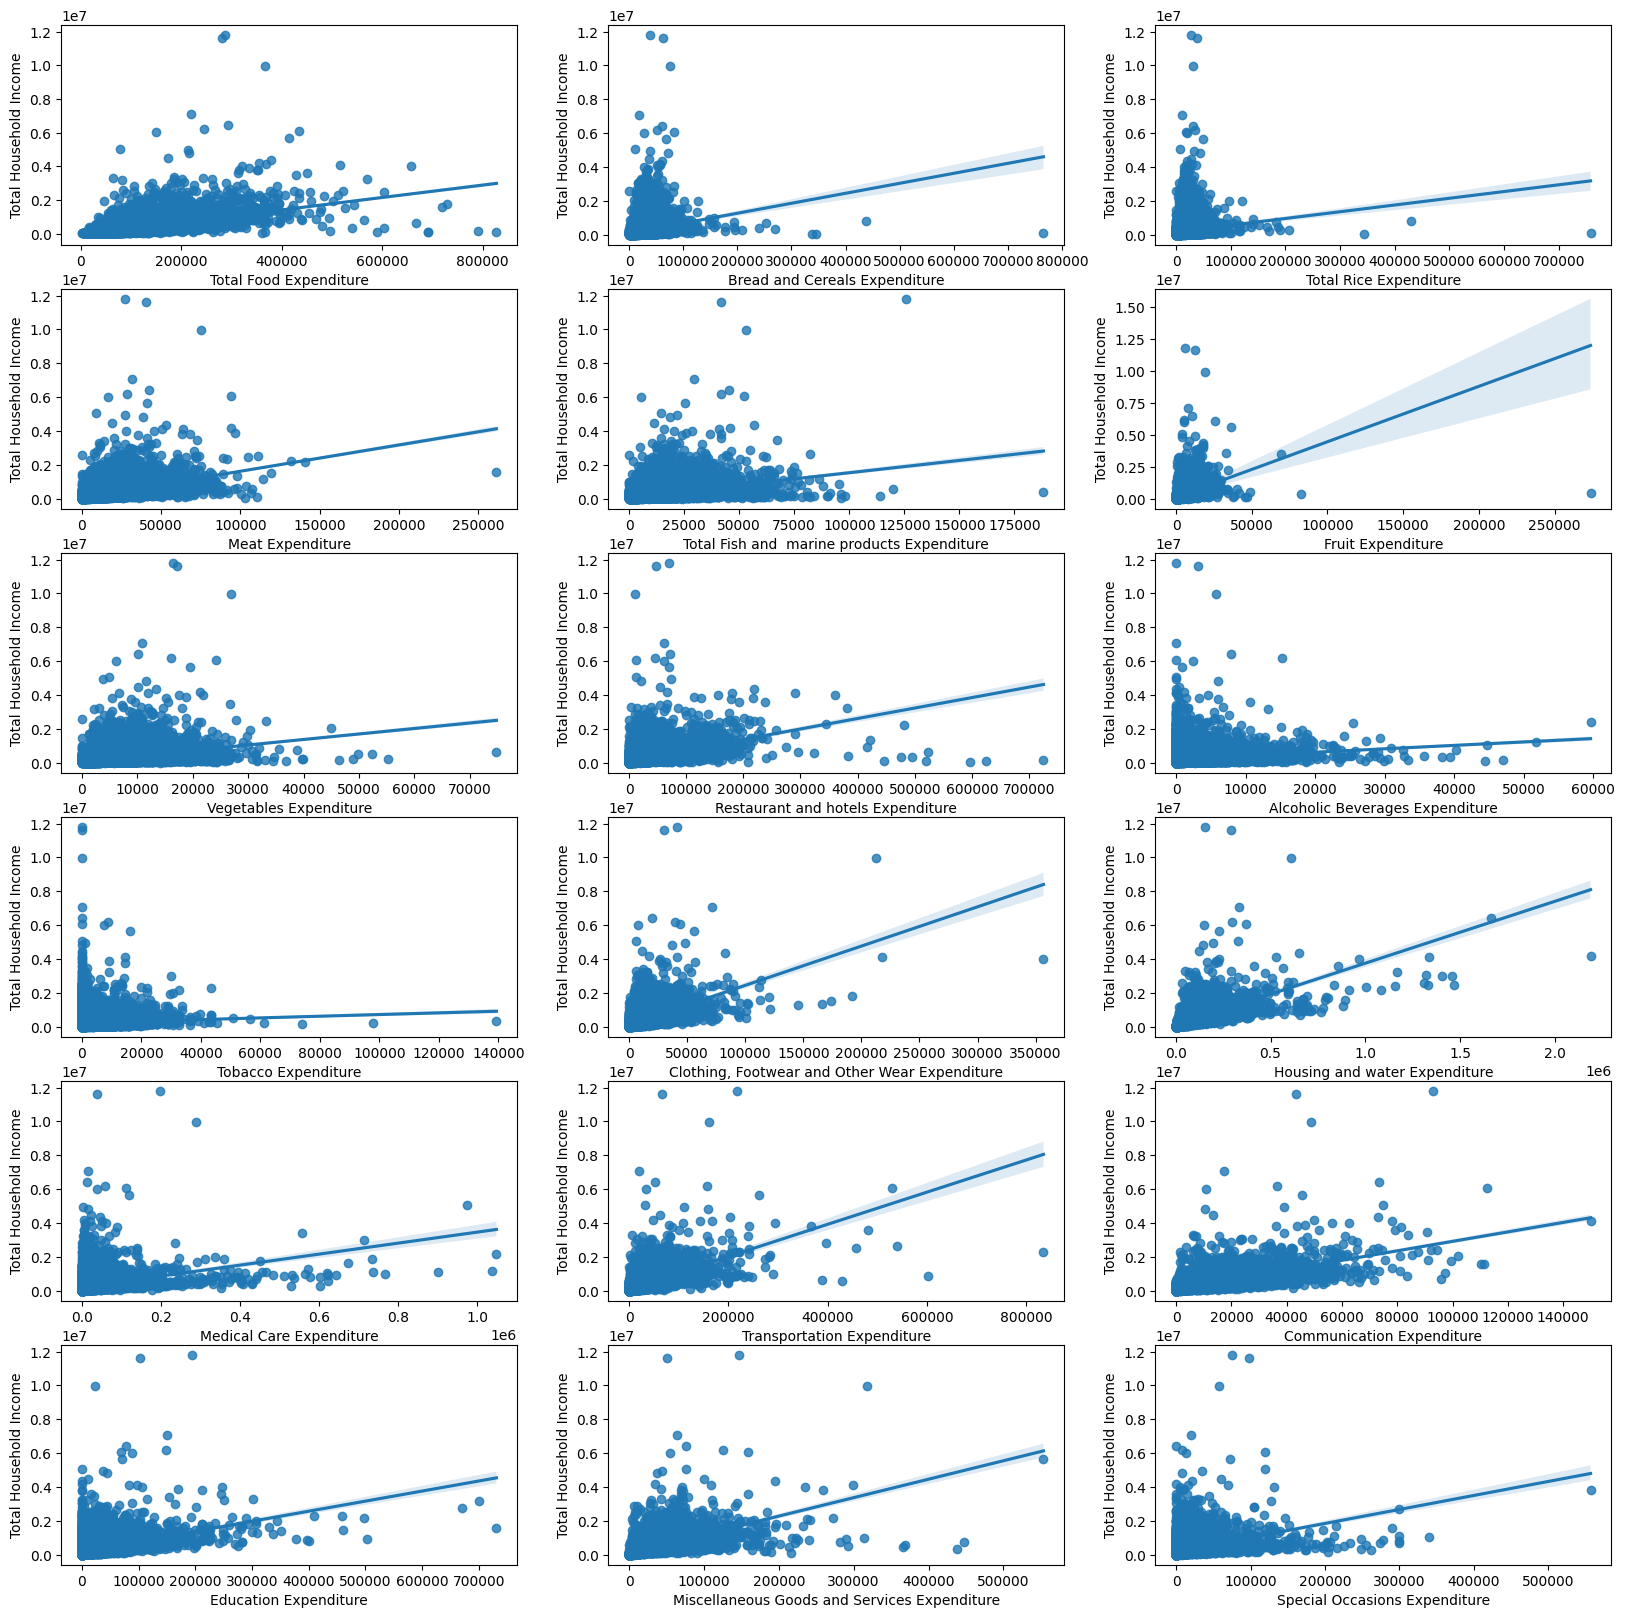

In [12]:
plt.figure(figsize=(20, 20))
i = 1
for exp in expenditures :
    plt.subplot(6,3,i)
    sns.regplot(x=X[exp], y=y)
    i += 1

With respect to the selected label, a lot of the features show a huge variance. This will limit the reliability of the regression model later.

Next, my goal is to see how the features and the income is correlated, and I want to expose this visually using a heatmap and the .corr() method.

In [13]:
Xy = X.copy()
Xy['THI'] = y

In [14]:
Xy_corr = Xy.corr()

<Axes: >

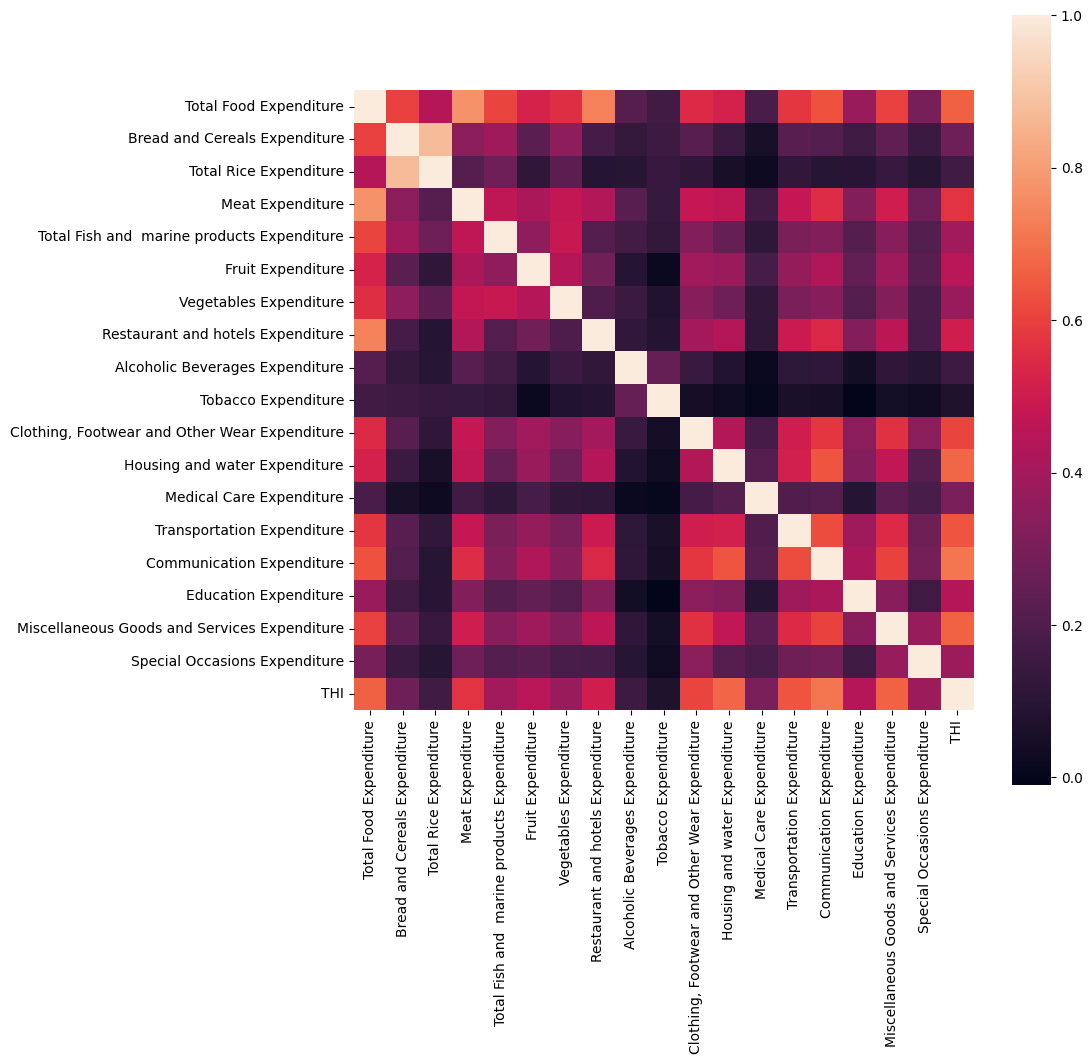

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(Xy_corr, square=True)

From here, it seems like the best correlation I have is 0.8, which is `Total Rice Expenditure` and `Bread and Cereals Expenditure`. Next to that, we have `Total Food Expenditure` has a somehow high correlation value with `Meat Expenditure` and `Vegetables Expenditure`. Makes sense especially that **Pinoys** are a culture of *rice and ulam*. It's not surprising that these are related.

Visualizing these three in a regression plot:

<Axes: xlabel='Total Food Expenditure', ylabel='Meat Expenditure'>

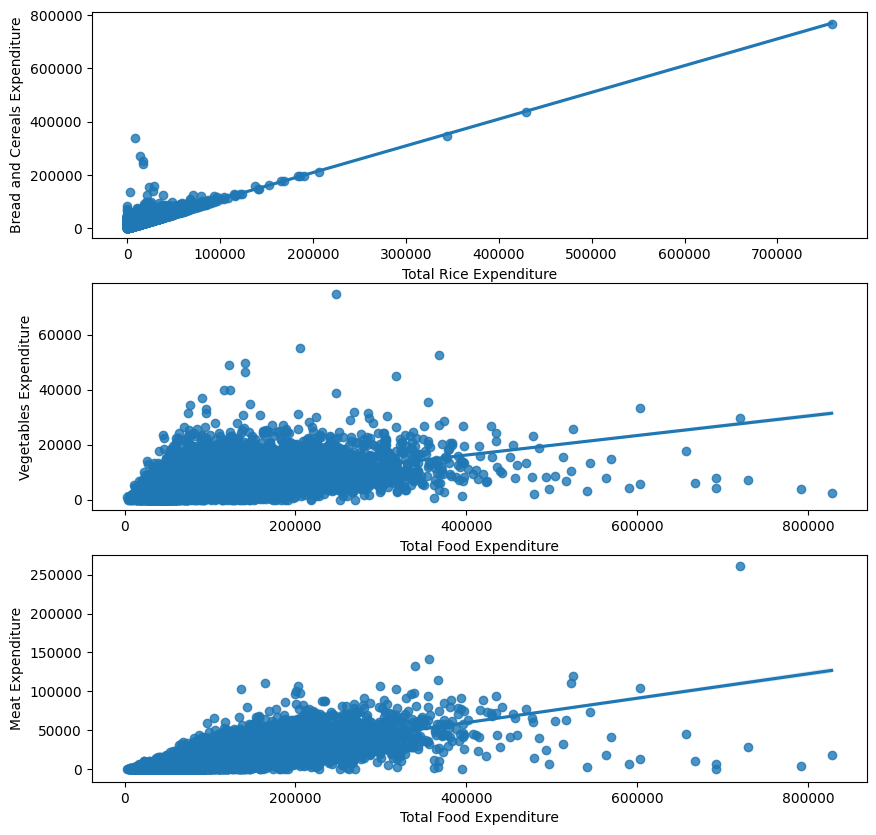

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.regplot(x=family_income_data['Total Rice Expenditure'], y = family_income_data['Bread and Cereals Expenditure'])
plt.subplot(3,1,2)
sns.regplot(x=family_income_data['Total Food Expenditure'], y = family_income_data['Vegetables Expenditure'])
plt.subplot(3,1,3)
sns.regplot(x=family_income_data['Total Food Expenditure'], y = family_income_data['Meat Expenditure'])

At this point, I want to show how skewed the data is. This is to set my expectation for regression modelling later.

C:\Users\dell\AppData\Local\Temp\ipykernel_10624\1103430973.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[exp])
C:\Users\dell\AppData\Local\Temp\ipykernel_10624\1103430973.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[exp])
C:\Users\dell\AppData\Local\Temp\ipykernel_10624\1103430

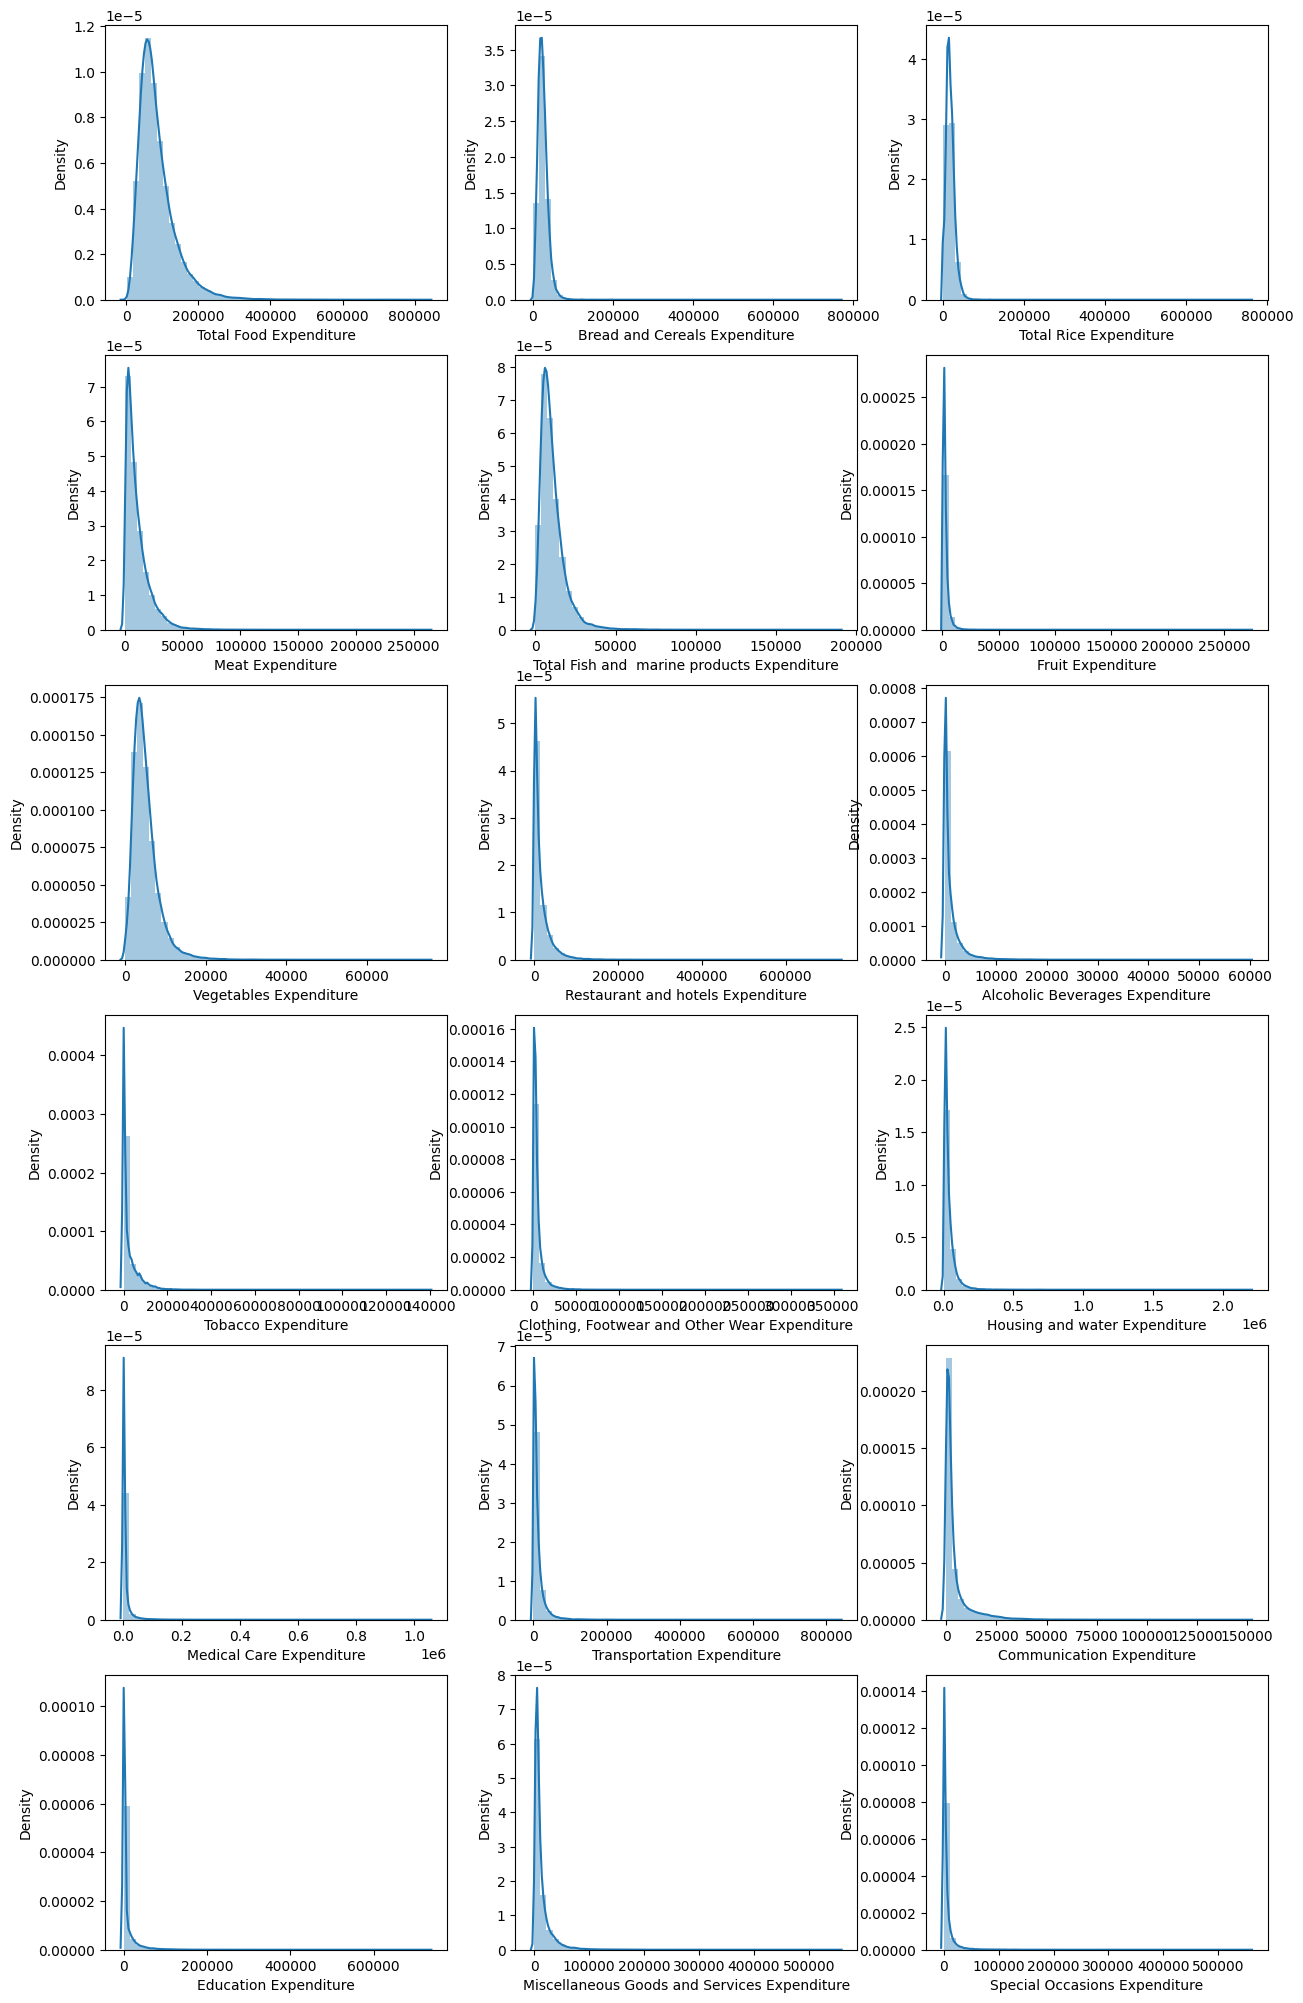

In [17]:
plt.figure(figsize=(15, 25))
i = 1
for exp in expenditures :
    plt.subplot(6,3,i)
    sns.distplot(X[exp])
    i += 1

Okay, so I tried to see how the data points are distributed and there is a heavy skew to the left. This tells me that a large number of participants in the dataset spends about the same amount for expenses. The KDE's, however, tell a different story. Most peaks are below the bin with the most number of datapoints, which tells us there are values to the extreme right that are skewing the curve heavily. 

While a lot of people agree on spending a certain range, there also exists a group that are spending at a maximum.

All the while, the distribution of income is this:

C:\Users\dell\AppData\Local\Temp\ipykernel_10624\835988325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, bins=1000)


<Axes: xlabel='Total Household Income', ylabel='Density'>

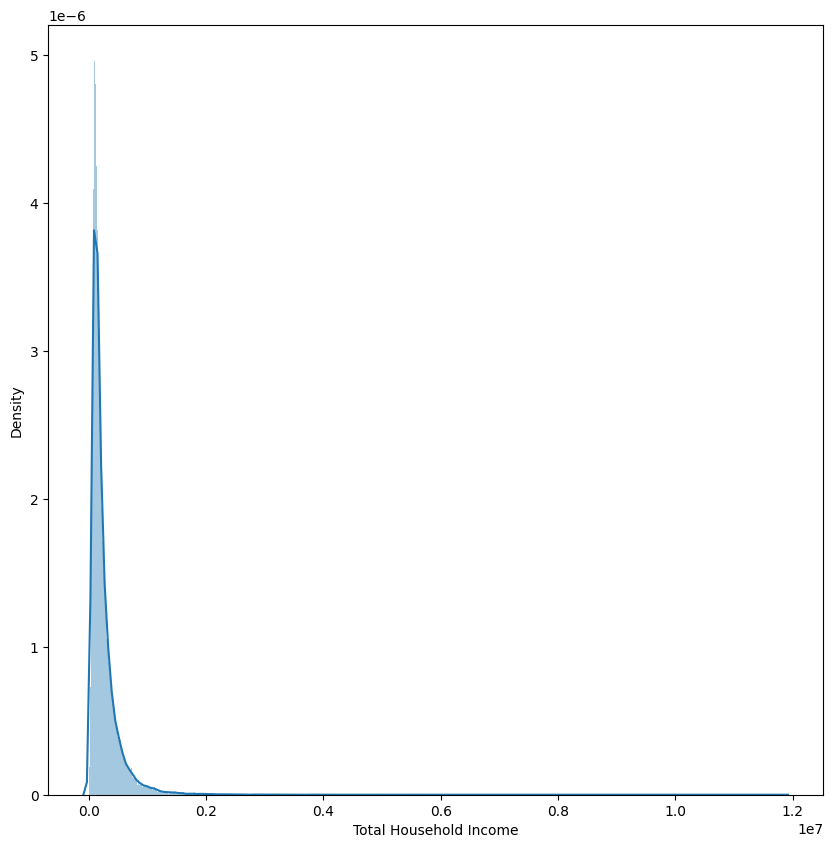

In [18]:
plt.figure(figsize=(10, 10))
sns.distplot(y, bins=1000)

This is an extremely ridiculous distribution curve. I set 20 bins and still the most distinguishable is still three.

What this tells me is that almost everyone in the dataset has a `Total Household Income` of between 5000-10000. It's quite disturbing.

Okay, now let's train a model. I'm going to pick `RandomForestRegressor` and `KNeighborsRegressor`, since these are great picks for chaotic scatterplots. Then, I'm also throwing in an `XGBRegressor` in the end to see if an optimized model can perform better than the earlier two.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

I'm setting verbose to True so that I can see what's happening under the model as it happens.

Moreover, I'm adding a comparative regplot for the actual values for Total Household Income and the ones predicted by the model. Ideally, we want to see them fit inside the regression line to say that "Okay, this is a good model."

### Random Forest Regressor

In [20]:
rfr = RandomForestRegressor(verbose=True, n_jobs=-1, n_estimators=1000)
rfr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.7min finished


RandomForestRegressor(n_estimators=1000, n_jobs=-1, verbose=True)

In [21]:
rfr.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s



Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


0.7622424536197657

In [47]:
import joblib 
joblib.dump(rfr, './model/ran_for_regressor_76.joblib')

['./model/ran_for_regressor_76.joblib']

Let's visually observe how the predicted values and the actual values correlate in a 45-degree line. The closer the points are in the line, the more it tells us that the model we selected did a great job in terms of predicting values.

We'll also repeat this method for the next models we use.

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\completerlib.py:149: UserWarning: using rootmodules_cache requires you to install the `pickleshare` library.
  ip.db['rootmodules_cache'] = rootmodules_cache
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.4s finished


[Text(0.5, 0, 'Total Household Income'), Text(0, 0.5, 'Predicted TIH')]

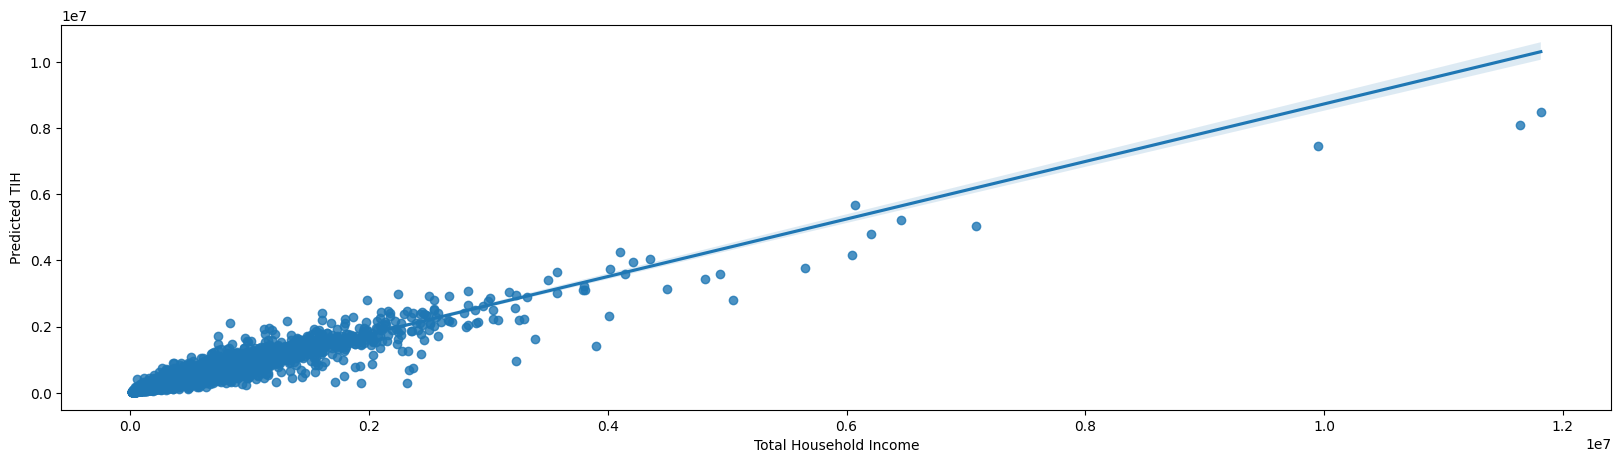

In [22]:
y_rfr_predict = rfr.predict(X)
mean_squared_error(y, y_rfr_predict)
plt.figure(figsize=(20,5))
ax = sns.regplot(x=y, y = y_rfr_predict)
ax.set(xlabel='Total Household Income', ylabel='Predicted TIH')

 ### K-Nearest Neighbors Regressor

In [23]:
knr = KNeighborsRegressor(n_neighbors=15, n_jobs=-1, leaf_size=50)
knr.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=50, n_jobs=-1, n_neighbors=15)

In [24]:
knr.score(X_test, y_test)

0.70798304763341

[Text(0.5, 0, 'Total Household Income'), Text(0, 0.5, 'Predicted TIH')]

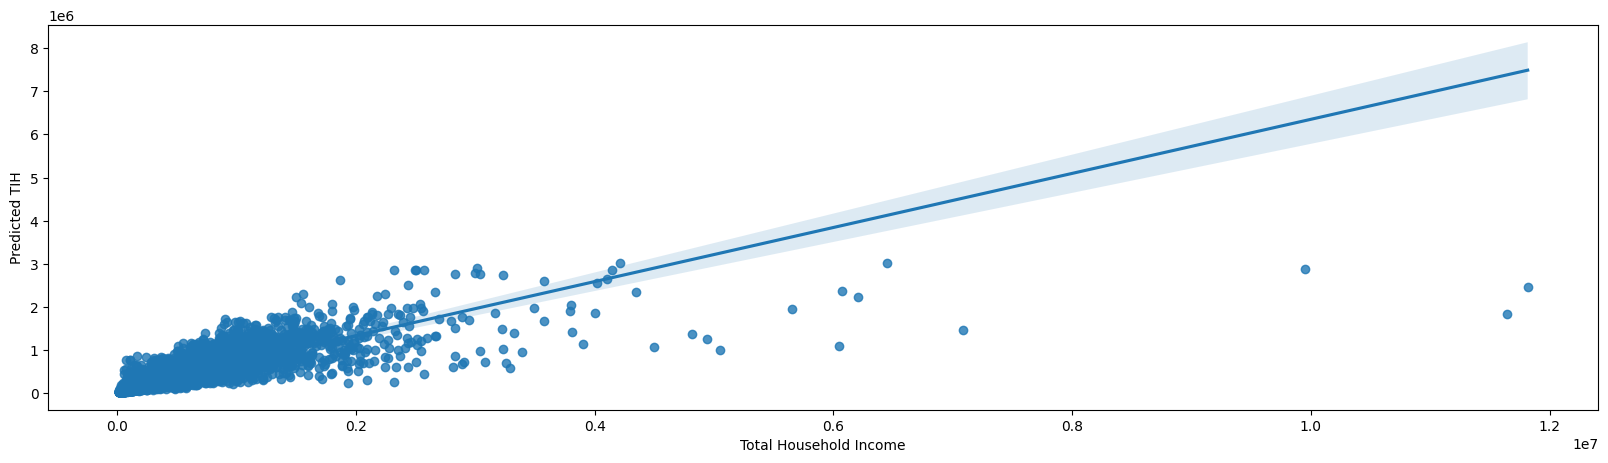

In [25]:
y_knr_predict = knr.predict(X)
mean_squared_error(y, y_knr_predict)
plt.figure(figsize=(20,5))
ax = sns.regplot(x=y, y = y_knr_predict)
ax.set(xlabel='Total Household Income', ylabel='Predicted TIH')

### XGBRegressor

In [26]:
xgbr = XGBRegressor(nthread = -1, eta=0.1, subsample=0.5)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, nthread=-1, ...)

In [27]:
xgbr.score(X_test, y_test)

0.7417824268341064

<Figure size 2000x500 with 0 Axes>

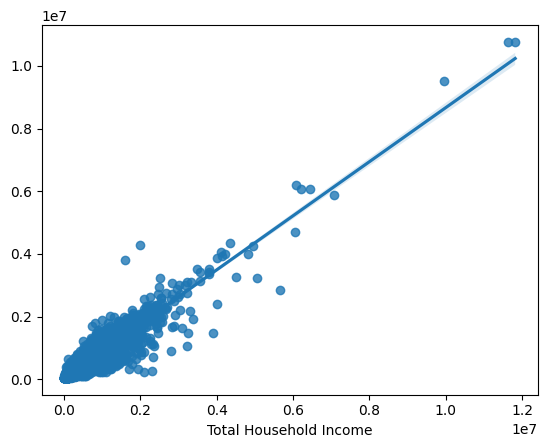

<Figure size 2000x500 with 0 Axes>

In [28]:
y_xgbr_predict = xgbr.predict(X)
mean_squared_error(y, y_xgbr_predict)
sns.regplot(x=y, y = y_xgbr_predict)
plt.figure(figsize=(20,5))

From the three models used, it seems like the best to yield score is the Random Forest Regressor. This model can still be improved by scaling the data points and normalizing the distribution.

## TASK 2: Predicting Income Bracket Through Classification

For this task, I aim to predict the income category of each household using the following features:
 -  Household Head Sex
 -  Household Head Age
 -  Household Head Marital Status
 -  Household Head Highest Grade Completed
 -  Household Head Job or Business Indicator
 -  Household Head Class of Worker
 -  Type of Household
 -  Total Number of Family members
 -  Total number of family members employed
 -  Type of Building/House
 -  Type of Roof
 -  Type of Walls
 -  House Floor Area
 -  House Age
 -  Number of bedrooms
 -  Tenure Status
 -  Toilet Facilities
 -  Electricity
 -  Main Source of Water Supply
 -  Number of Television
 -  Number of CD/VCD/DVD
 -  Number of Component/Stereo set
 -  Number of Refrigerator/Freezer
 -  Number of Washing Machine
 -  Number of Airconditioner
 -  Number of Car, Jeep, Van
 -  Number of Landline/wireless telephones
 -  Number of Cellular phone
 -  Number of Personal Computer
 -  Number of Stove with Oven/Gas Range
 -  Number of Motorized Banca
 -  Number of Motorcycle/Tricycle
 
 For consistency, I will also be using the same models I used in the Regression task: Random Forest,KNeigbors, and XGBoost Classifiers.

Before I get to the task of one-hot encoding it, I have to know how big I could make the dataset by checking the unique values per feature columns. Just the ones with types 'object':

In [116]:
class_fid = family_income_data.loc[: , ['Household Head Sex' ,'Household Head Age' ,'Household Head Marital Status' ,'Household Head Highest Grade Completed' ,'Household Head Job or Business Indicator' ,'Household Head Class of Worker' ,'Type of Household' ,'Total Number of Family members' ,'Total number of family members employed' ,'Type of Building/House' ,'Type of Roof' ,'Type of Walls' ,'House Floor Area' ,'House Age' ,'Number of bedrooms' ,'Tenure Status' ,'Toilet Facilities' ,'Electricity' ,'Main Source of Water Supply' ,'Number of Television' ,'Number of CD/VCD/DVD' ,'Number of Component/Stereo set' ,'Number of Refrigerator/Freezer' ,'Number of Washing Machine' ,'Number of Airconditioner' ,'Number of Car, Jeep, Van' ,'Number of Landline/wireless telephones' ,'Number of Cellular phone' ,'Number of Personal Computer' ,'Number of Stove with Oven/Gas Range' ,'Number of Motorized Banca' ,'Number of Motorcycle/Tricycle' ]]

In [117]:
class_fid_cat = []
for col in class_fid.columns :
    if class_fid[col].dtype == object :
        class_fid_cat.append(col)
        print(col," : ",len(class_fid[col].value_counts()))

Household Head Sex  :  2
Household Head Marital Status  :  6
Household Head Highest Grade Completed  :  46
Household Head Job or Business Indicator  :  2
Household Head Class of Worker  :  7
Type of Household  :  3
Type of Building/House  :  6
Type of Roof  :  7
Type of Walls  :  6
Tenure Status  :  8
Toilet Facilities  :  7
Main Source of Water Supply  :  11


I'm afraid the `Household Head Highest Grade Completed` could slow down my simulation, so I'm going to simplify this:

First, I have to check the unique values for the column.

In [118]:
for item in family_income_data['Household Head Highest Grade Completed'].value_counts().index :
    print(".", item)

. High School Graduate
. Elementary Graduate
. Grade 4
. Grade 5
. Second Year High School
. Grade 3
. Third Year High School
. Business and Administration Programs
. Second Year College
. Grade 2
. First Year High School
. No Grade Completed
. Third Year College
. Teacher Training and Education Sciences Programs
. First Year College
. Grade 1
. Engineering and Engineering Trades Programs
. Engineering and Engineering trades Programs
. Health Programs
. Computing/Information Technology Programs
. Security Services Programs
. Post Baccalaureate
. Grade 6
. Agriculture, Forestry, and Fishery Programs
. Transport Services Programs
. Second Year Post Secondary
. Social and Behavioral Science Programs
. Fourth Year College
. First Year Post Secondary
. Personal Services Programs
. Humanities Programs
. Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree
. Law Programs
. Basic Programs
. 

Next, I manually sort them out to five categories:

In [119]:
educ_attainment = { 'DNA/Primary/Elementary' : ['Elementary Graduate', 'Grade 4', 'Grade 5', 'Grade 3', 'Grade 2', 'Grade 1', 'Grade 6', 'No Grade Completed', 'Preschool'], 
                    'Secondary' : ['High School Graduate', 'Second Year High School', 'Third Year High School', 'First Year High School'],
                    'Attended College' : ['Second Year College', 'Third Year College', 'First Year College', 'Second Year Post Secondary', 'Fourth Year College', 'First Year Post Secondary'],
                    'Post Baccalaureate' : ['Post Baccalaureate'], 
                    'Degrees/Programs' : ['Business and Administration Programs', 'Teacher Training and Education Sciences Programs', 'Engineering and Engineering Trades Programs', 'Engineering and Engineering trades Programs', 'Engineering and Engineering trades Programs', 'Health Programs', 'Computing/Information Technology Programs', 'Security Services Programs', 'Agriculture, Forestry, and Fishery Programs',
                                  'Transport Services Programs', 'Social and Behavioral Science Programs', 'Social and Behavioral Science Programs', 'Personal Services Programs', 'Humanities Programs', 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
                                  'Law Programs', 'Architecture and Building Programs', 'Basic Programs', 'Journalism and Information Programs', 'Arts Programs', 'Life Sciences Programs', 'Manufacturing and Processing Programs',
                                  'Social Services Programs', 'Physical Sciences Programs', 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)',
                                  'Veterinary Programs', 'Environmental Protection Programs'
                                 ]
                    }

Then, I use pd.Series.apply() to create a new column with these categories

In [120]:
family_income_data['Household Head Highest Grade Completed (Simplified)'] = family_income_data['Household Head Highest Grade Completed'].apply(lambda x : ''.join([key for key in educ_attainment.keys() if x in educ_attainment[key]]))

In [121]:
family_income_data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household Head Highest Grade Completed (Simplified)
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1,Degrees/Programs
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2,Degrees/Programs
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0,DNA/Primary/Elementary
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0,DNA/Primary/Elementary
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/

I have to create the income categories first before fitting a model. I decided to make four categories that will be used as labels based on the Total Household Income values:

1. **Category 1** - (< 25% of the distribution)
2. **Category 2** - (25%-50% of the distribution)
3. **Category 3** - (50%-75% of the distribution)
4. **Category 4** - (> 75% of the distribution)

I think to make things simple, dividing using the quartiles will suffice.

In [122]:
family_income_data['Total Household Income'].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

I use pd.qcut to divide the data by quartiles, and use custom labels as I have described earlier:

In [123]:
family_income_data['Income Category'] = pd.qcut(family_income_data['Total Household Income'], q=4, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])

In [124]:
def replace_labels_with_numbers(df, column_name):
    """
    Replaces categorical labels in a specified column of a DataFrame with numerical labels.
    
    Parameters:
    - df: pandas DataFrame containing the column to be modified.
    - column_name: string, the name of the column whose labels are to be replaced.
    
    Returns:
    - A DataFrame with the specified column's labels replaced by numerical labels.
    """
    # Define the mapping from categories to numbers
    label_to_number = {
        'Category 1': 0,
        'Category 2': 1,
        'Category 3': 2,
        'Category 4': 3
    }
    
    # Replace the categorical labels with numerical labels
    df[column_name] = df[column_name].map(label_to_number)
    
    return df

replace_labels_with_numbers(family_income_data, 'Income Category')

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household Head Highest Grade Completed (Simplified),Income Category
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1,Degrees/Programs,3
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2,Degrees/Programs,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0,DNA/Primary/Elementary,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0,DNA/Primary/Elementary,1
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Bu

In [125]:
family_income_data

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Household Head Highest Grade Completed (Simplified),Income Category
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1,Degrees/Programs,3
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2,Degrees/Programs,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0,DNA/Primary/Elementary,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0,DNA/Primary/Elementary,1
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Bu

Okay, at this point, I can create my feature and label sets:

In [126]:
XX =  family_income_data.loc[:, [ 'Household Head Sex', 'Household Head Age', 'Household Head Marital Status','Household Head Highest Grade Completed (Simplified)','Household Head Job or Business Indicator','Household Head Class of Worker' , 'Type of Household' , 'Total Number of Family members' , 'Total number of family members employed', 'Type of Building/House', 'Type of Roof' , 'Type of Walls' , 'House Floor Area' , 'House Age' , 'Number of bedrooms' , 
'Tenure Status' , 'Toilet Facilities' , 'Electricity' , 'Main Source of Water Supply' , 'Number of Television' , 'Number of CD/VCD/DVD' , 'Number of Component/Stereo set' , 'Number of Refrigerator/Freezer' , 'Number of Washing Machine' , 
'Number of Airconditioner' , 'Number of Car, Jeep, Van' , 'Number of Landline/wireless telephones' , 'Number of Cellular phone' , 'Number of Personal Computer' , 'Number of Stove with Oven/Gas Range' , 'Number of Motorized Banca' , 'Number of Motorcycle/Tricycle']]
yy = family_income_data['Income Category']

In [127]:
XX

,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed (Simplified),Household Head Job or Business Indicator,Household Head Class of Worker,Type of Household,Total Number of Family members,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,Female,49,Single,Degrees/Programs,With Job/Business,Worked for government/government corporation,Extended Family,4,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,Male,40,Married,Degrees/Programs,With Job/Business,Worked for private establishment,Single Family,3,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,Male,39,Married,DNA/Primary/Elementary,With Job/Business,Worked for private establishment,Single Family,6,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,Male,52,Married,DNA/Primary/Elementary,With Job/Business,Employer in own family-operated farm or business,Single Family,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,Male,65,Married,DNA/Primary/Elementary,With Job/Business,Self-employed wihout any employee,Single Family,4,2,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,54,16,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,0,0,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,Male,42,Married,DNA/Primary/Elementary,With Job/Business,Self-employed wihout any employee,Extended Family,6,0,Single house,Mixed but predominantly strong materials,Strong,30,14,1,Own or owner-like possession of house and lot,Open pit,1,"Own use, tubed/piped deep well",1,0,0,0,0,0,0,0,1,0,0,0,0
41540,Male,49,Married,DNA/Primary/Elementary,With Job/Business,Self-employed wihout any employee,Single Family,6,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,40,6,2,Own or owner-like possession of house and lot,Open pit,1,"Own use, tubed/piped deep well",1,1,0,0,0,0,0,0,3,0,0,0,0
41541,Male,56,Married,DNA/Primary/Elementary,With Job/Business,Self-employed wihout any employee,Single Family,4,1,Single house,"Light material (cogon,nipa,anahaw)",Strong,35,20,1,"Own house, rent-free lot with consent of owner",Open pit,1,"Own use, tubed/piped deep well",0,0,0,0,0,0,0,0,1,0,0,0,0
41542,Male,34,Widowed,Secondary,With Job/Business,Self-employed wihout any employee,Extended Family,9,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,25,11,1,"Own house, rent-free lot without consent of owner",Open pit,1,Dug well,0,0,0,0,0,0,0,0,2,0,0,0,0


Looks great! Now time to One-Hot encode using sklearn's preprocessing library.

In [128]:
from sklearn.preprocessing import OneHotEncoder

Same with earlier, I need to know if I have any null values for any of my features.

<Axes: >

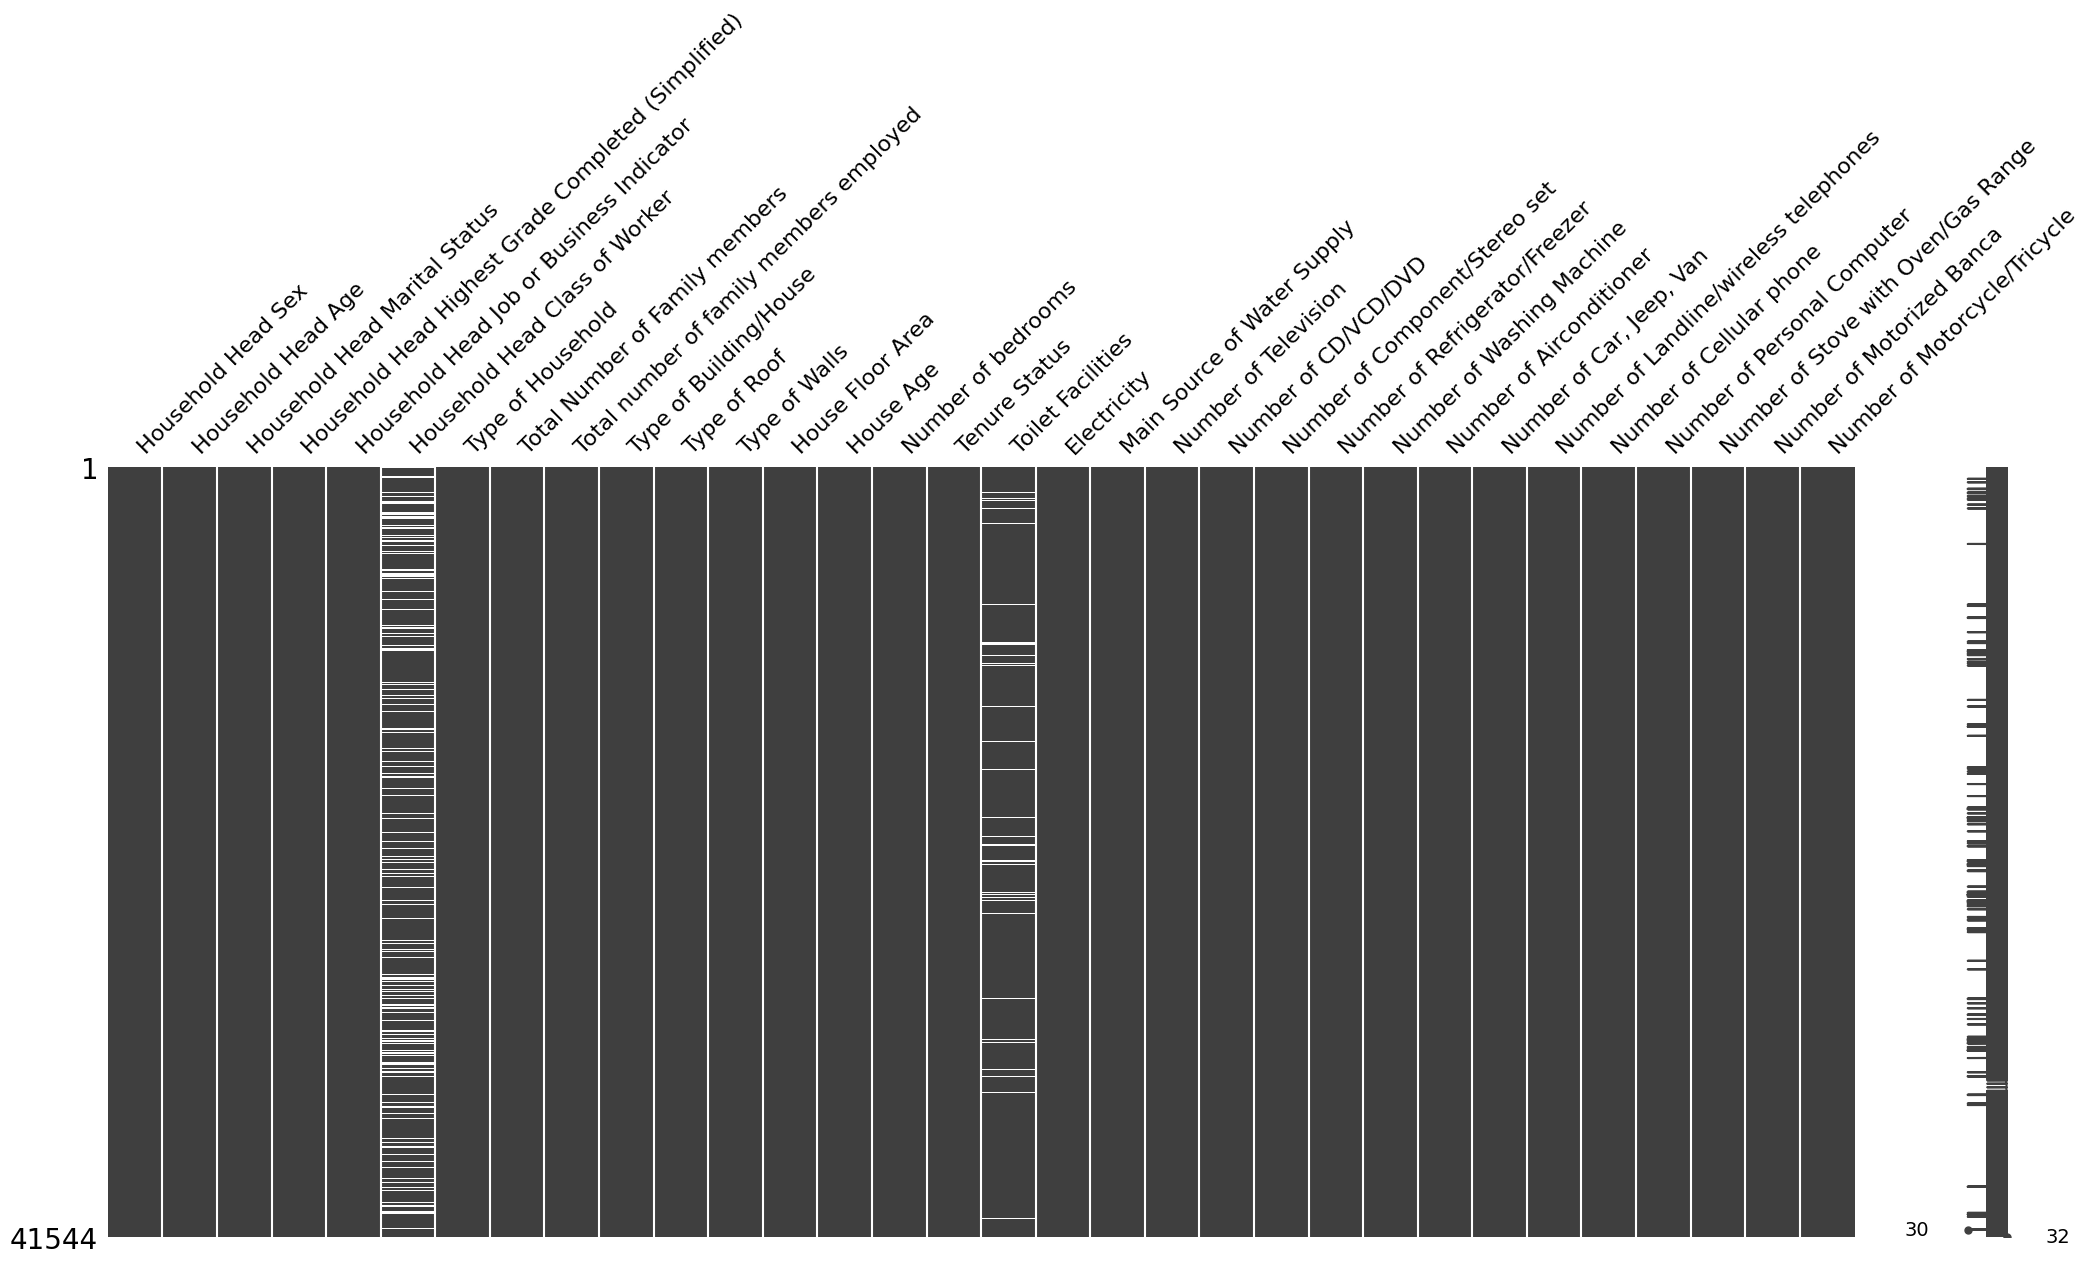

In [98]:
msno.matrix(XX)

Woops, need to clean that up with `fillna`. Let's just place a string called 'N/A' for those.

In [129]:
XX['Household Head Class of Worker'].fillna('N/A', inplace=True)

Earlier, I made a list of categorical values, and I remember I created a new feature called 'Household Head Highest Grade Completed (Simplified)'. I want to use this in place of the huge 'Household Head Highest Grade Completed ' column.

In [131]:
class_fid_cat

['Household Head Sex',
 'Household Head Marital Status',
 'Household Head Highest Grade Completed',
 'Household Head Job or Business Indicator',
 'Household Head Class of Worker',
 'Type of Household',
 'Type of Building/House',
 'Type of Roof',
 'Type of Walls',
 'Tenure Status',
 'Toilet Facilities',
 'Main Source of Water Supply']

In [132]:
class_fid_cat[2] = 'Household Head Highest Grade Completed (Simplified)'

Now, I can make the categorical section of my XX data set, and then One-Hot encode it.

In [134]:
XX_cat = XX.loc[:, class_fid_cat]

In [135]:
ohe = OneHotEncoder()  # Ensure the output is a dense array
XX_t = ohe.fit_transform(XX_cat)
class_fid_num = [col for col in X.columns if col not in class_fid_cat]
XX_tt_0 = family_income_data[class_fid_num]
XX_tt = XX_tt_0.to_numpy()  # Convert to NumPy array for consistency

# Ensure both arrays are dense if not already
XX_t_dense = XX_t.toarray() if hasattr(XX_t, "toarray") else XX_t
XX_tt_dense = XX_tt.toarray() if hasattr(XX_tt, "toarray") else XX_tt

# Now concatenate the dense arrays
XX_T = np.concatenate((XX_t_dense, XX_tt_dense), axis=1)

In [137]:
XX_t

<41544x73 sparse matrix of type '<class 'numpy.float64'>'
	with 498528 stored elements in Compressed Sparse Row format>

Great! Now, my categorical features are encoded to ones and zeroes. Time to append those to my numerical ones and create my final XX set.

In [59]:
XX_tt

array([[117848,  42140,  38300, ...,  36200,  34056,   7200],
       [ 67766,  17329,  13008, ...,  29300,   9150,   1500],
       [ 61609,  34182,  32001, ...,    425,   6450,    500],
       ...,
       [ 45882,  28646,  27339, ...,      0,   3570,    500],
       [ 81416,  29996,  26655, ...,   5295,   5760,   1000],
       [ 78195,  43485,  41205, ...,     80,   6060,   2500]], dtype=int64)

ValueError: zero-dimensional arrays cannot be concatenated

Now, I can train-test-split my data. Similar to the regression part, I'm using an 80%-20% division:

In [139]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX_T, yy, test_size=0.2, random_state=41)

### Random Forest Classifier

In [61]:
rfc = RandomForestClassifier(verbose = True, n_jobs=-1)
yy_fit_rfc = rfc.fit(XX_train, yy_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


In [62]:
yy_pred_rfc = yy_fit_rfc.predict(XX_T)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [64]:
import joblib
joblib.dump(rfc,'random_forest_classifier_94.joblib')

['random_forest_classifier_94.joblib']

Let's see how well the predictions made are using the classification report:

In [63]:
print(classification_report(yy, yy_pred_rfc))

              precision    recall  f1-score   support

  Category 1       0.96      0.96      0.96     10387
  Category 2       0.91      0.93      0.92     10385
  Category 3       0.93      0.92      0.93     10386
  Category 4       0.98      0.96      0.97     10386

    accuracy                           0.94     41544
   macro avg       0.94      0.94      0.94     41544
weighted avg       0.94      0.94      0.94     41544



Awesome! I think this model did pretty well. Let's add a confusion matrix comparison just to see how the two values vary

C:\Users\dell\AppData\Local\Temp\ipykernel_10624\4225265880.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_10624\4225265880.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


Text(0, 0.5, 'True')

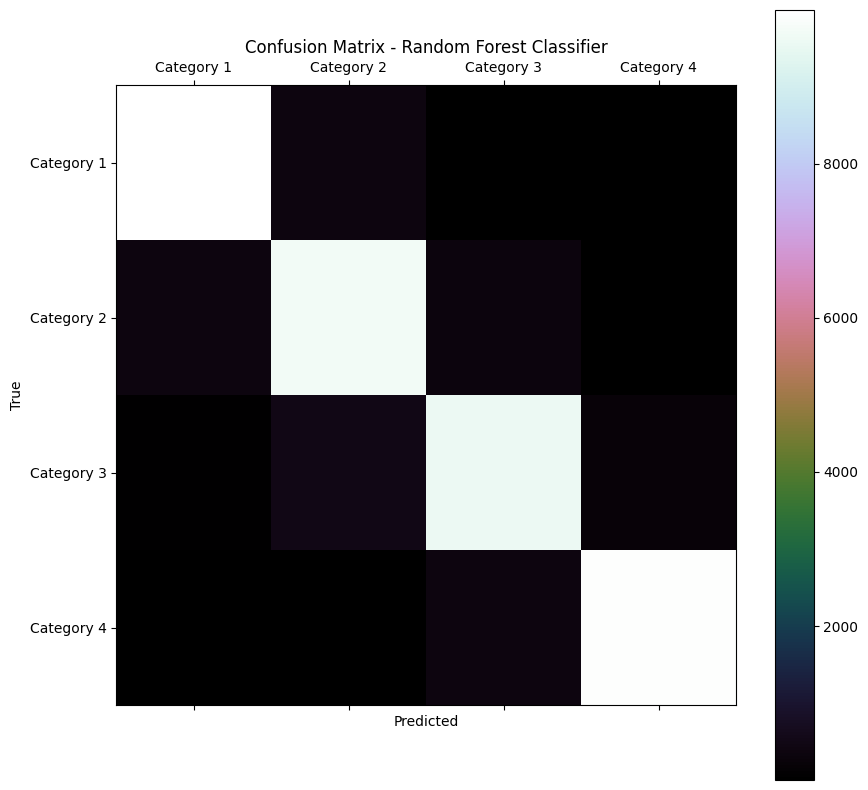

In [65]:
labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = confusion_matrix(yy, yy_pred_rfc, labels=labels)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap='cubehelix')
plt.title('Confusion Matrix - Random Forest Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')


That diagonal lighter shade tells me that a large part of my Predicted matched the Actual values.

### KNeighbors Classifier

In [66]:
knc = KNeighborsClassifier(n_jobs=-1)
yy_fit_knc= knc.fit(XX_train, yy_train)

In [67]:
yy_pred_knc = yy_fit_knc.predict(XX_T)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File

In [68]:
print(classification_report(yy, yy_pred_knc))

              precision    recall  f1-score   support

  Category 1       0.78      0.87      0.82     10387
  Category 2       0.65      0.69      0.67     10385
  Category 3       0.71      0.66      0.68     10386
  Category 4       0.91      0.80      0.85     10386

    accuracy                           0.76     41544
   macro avg       0.76      0.76      0.76     41544
weighted avg       0.76      0.76      0.76     41544



KNeighbors didn't do as well as the Random Forest Regressor.

C:\Users\dell\AppData\Local\Temp\ipykernel_10624\681011978.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_10624\681011978.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


Text(0, 0.5, 'True')

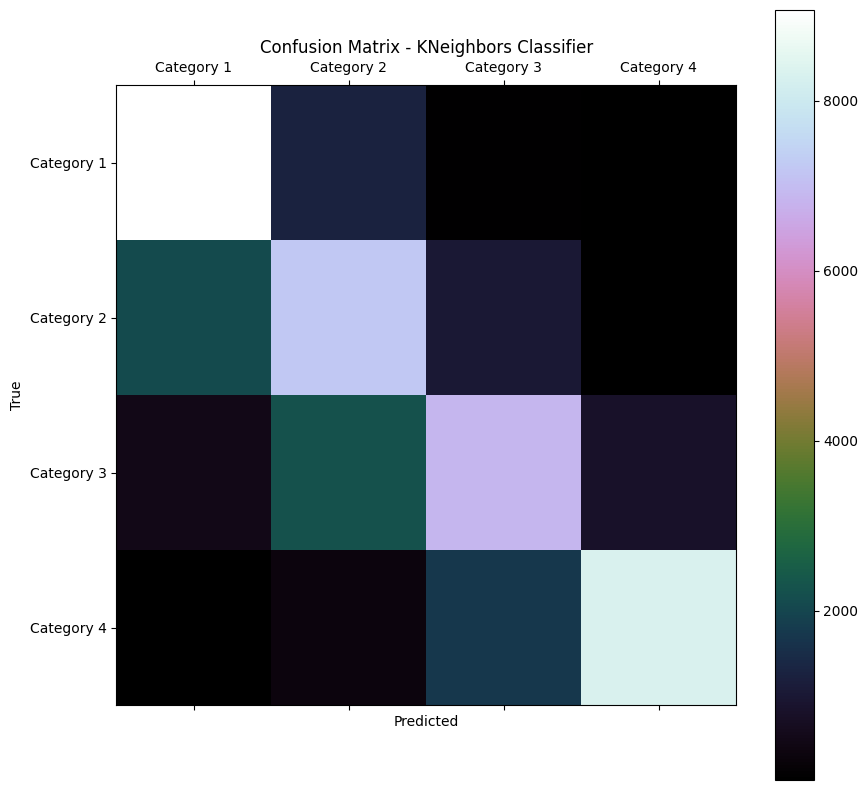

In [69]:
labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
cm = confusion_matrix(yy, yy_pred_knc, labels=labels)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap='cubehelix')
plt.title('Confusion Matrix - KNeighbors Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

Lastly, let's do an XGB Classifier.

### XGB Classifier

In [140]:
yy_train

15173    3
22266    0
3986     2
30988    0
845      0
        ..
31597    1
41281    1
20450    0
931      0
34752    0
Name: Income Category, Length: 33235, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [147]:
xbc = XGBClassifier(verbose = True, n_jobs=-1)
yy_fit_xbc = xbc.fit(XX_train, yy_train)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [02:45:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [148]:
yy_pred_xbc = yy_fit_xbc.predict(XX_T)

In [149]:
print(classification_report(yy, yy_pred_xbc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     10387
           1       0.77      0.81      0.79     10385
           2       0.83      0.81      0.82     10386
           3       0.95      0.90      0.93     10386

    accuracy                           0.86     41544
   macro avg       0.86      0.86      0.86     41544
weighted avg       0.86      0.86      0.86     41544



C:\Users\dell\AppData\Local\Temp\ipykernel_10624\3305996049.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\dell\AppData\Local\Temp\ipykernel_10624\3305996049.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


Text(0, 0.5, 'True')

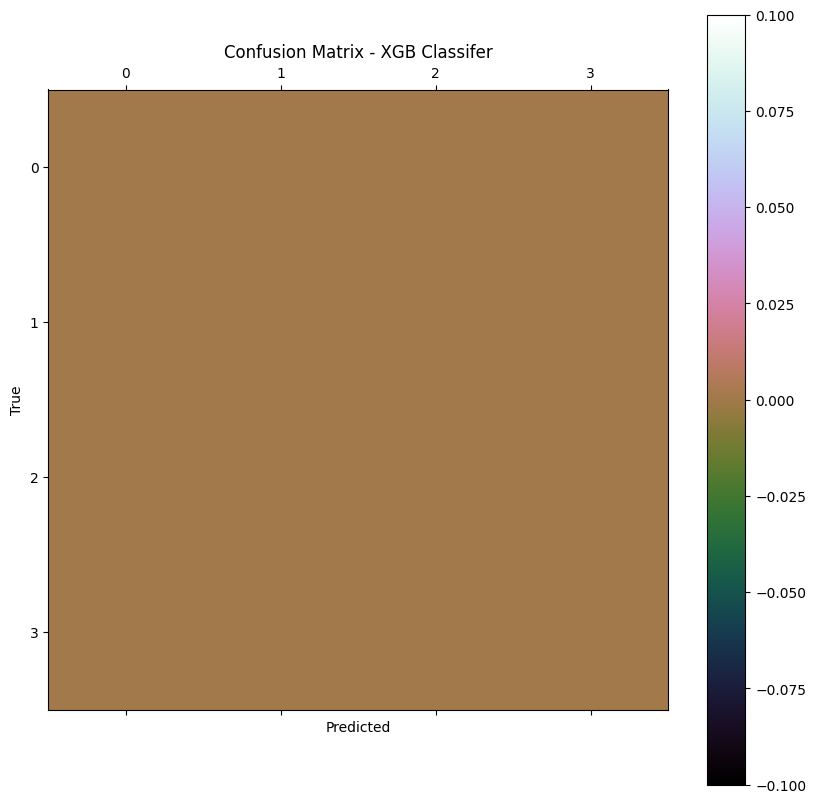

In [150]:
labels = ['0','1','2','3']
cm = confusion_matrix(yy, yy_pred_knc, labels=labels)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap='cubehelix')
plt.title('Confusion Matrix - XGB Classifer')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

Seeing this final product, the best classifier to use to predict the Income Category was the Random Forest Classifier. KNN predicted worse possibly because it's hard to define a nearest neighbor classification with the huge variance in our dataset. XGBoost, on the other hand, performs better for Time-Series data.